In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
pd.options.display.max_columns = None

# Content
1. [Load data](#Load-data)
2. [Imputation assesment](#Imputation-Assesment)

In [40]:
os.getcwd()

'C:\\code\\Uni\\ba\\notebooks'

In [2]:
data = pd.read_csv("metrics/eval_storage.csv")
data.head()

,Fold,Imputed Set,Model,Model Count,acc,b_acc,sensitivity,specificity,ppv,auc
0,0,1,rf,0,0.732143,0.693676,0.909091,0.478261,0.714286,0.792490
1,0,1,lr,0,0.750000,0.708827,0.939394,0.478261,0.720930,0.815547
2,0,2,rf,1,0.714286,0.685112,0.848485,0.521739,0.717949,0.801054
3,0,2,lr,1,0.714286,0.678524,0.878788,0.478261,0.707317,0.836627
4,0,3,rf,2,0.732143,0.693676,0.909091,0.478261,0.714286,0.781950


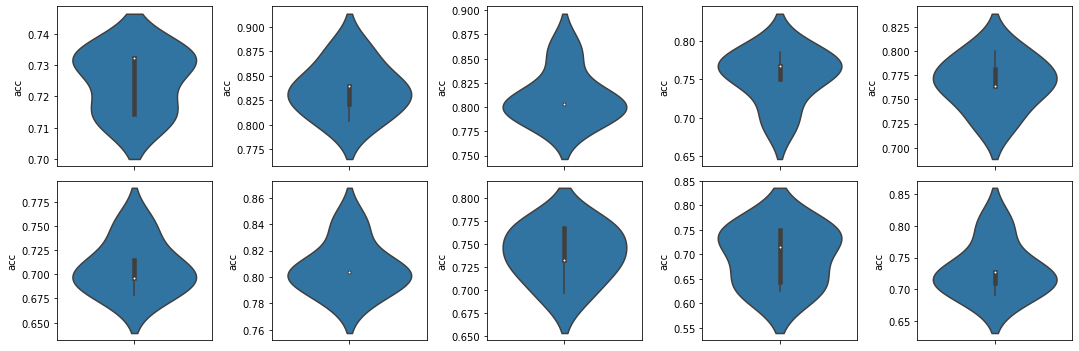

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
for i, model in enumerate(["rf", "lr"]):
    for j in range(5):
        sns.violinplot(y = data[(data["Fold"] == j) & (data["Model"] == model)]["acc"], ax = axes[i,j])
plt.tight_layout()
plt.show()
# additional ideas
# mean ROC for every fold and mean AUC for every fold including std

In [4]:
for i in enumerate(["rf", "lr"]):
    print(i)

(0, 'rf')
(1, 'lr')


In [5]:
data.loc[0, "Fold"] + 1 + data.loc[0, "Imputed Set"]

0

In [4]:
data[(data["Fold"]== 0) & (data["Model"]=="rf")]

,Fold,Model,acc,b_acc,sensitivity,specificity,ppv,fpr,tpr,auc,precision,recall,a_precision
0,0,rf,0.767857,0.737154,0.909091,0.565217,0.750000,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.18181818 0.18181818 0...,0.810277,[0.62264151 0.61538462 0.62745098 0.64 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.851994
2,0,rf,0.714286,0.685112,0.848485,0.521739,0.717949,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.21212121 0.33333333 0...,0.805665,[0.63461538 0.62745098 0.65306122 0.65957447 0...,[1. 0.96969697 0.96969697 0.93939394 0...,0.863843
4,0,rf,0.732143,0.693676,0.909091,0.478261,0.714286,[0. 0. 0. 0. 0...,[0. 0.03030303 0.09090909 0.15151515 0...,0.800395,[0.63461538 0.62745098 0.64 0.65306122 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.827009
6,0,rf,0.732143,0.700264,0.878788,0.521739,0.725000,[0. 0. 0.08695652 0.08695652 0...,[0. 0.03030303 0.03030303 0.33333333 0...,0.739130,[0.6 0.59259259 0.60377358 0.61538462 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.752704
8,0,rf,0.714286,0.691700,0.818182,0.565217,0.729730,[0. 0. 0.04347826 0.04347826 0...,[0. 0.03030303 0.03030303 0.06060606 0...,0.760211,[0.61111111 0.60377358 0.61538462 0.62745098 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.780830


In [9]:
dash = '-' * 90
print(dash)
print('{:<10s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
print(dash)
for model in ['rf', 'lr']:
    tmp = []
    for i in range(5):
        tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)]["sensitivity"].mean())
        tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)]["sensitivity"].std())
    tmp.append(data[data["Model"] == model]["sensitivity"].mean())
    tmp.append(data[data["Model"] == model]["sensitivity"].std())
    print('{:<10s}{:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  '.format(model,*tmp))

------------------------------------------------------------------------------------------
Model     Fold 1       Fold 2       Fold 3       Fold 4       Fold 5       Combined     
------------------------------------------------------------------------------------------
rf        0.87 (0.04)  0.88 (0.02)  0.90 (0.04)  0.83 (0.08)  0.87 (0.02)  0.87 (0.05)  
lr        0.87 (0.04)  0.84 (0.01)  0.81 (0.03)  0.75 (0.05)  0.87 (0.06)  0.83 (0.06)  


In [9]:
def print_summary(data, metric):
    """
    Prints a summary for a metric in the DataFrame for each classifier
    Paramters:
    ----------
    data: pd.DataFrame
        dataframe with all evaluation metrics
    metric: string
        string identifier of metric
    """
    dash = '-' * 90
    print(metric)
    print(dash)
    print('{:<10s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
    print(dash)
    for model in ['rf', 'lr']:
        tmp = []
        for i in range(5):
            tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)][metric].mean())
            tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)][metric].std())
        tmp.append(data[data["Model"] == model][metric].mean())
        tmp.append(data[data["Model"] == model][metric].std())
        print('{:<10s}{:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  '.format(model,*tmp))

In [10]:
cv_cols = ['acc', 'b_acc', 'sensitivity', 'specificity', 'ppv', 'auc']
for x in cv_cols:
    print_summary(data, x)

acc
------------------------------------------------------------------------------------------
Model     Fold 1       Fold 2       Fold 3       Fold 4       Fold 5       Combined     
------------------------------------------------------------------------------------------
rf        0.72 (0.01)  0.84 (0.03)  0.81 (0.03)  0.75 (0.03)  0.77 (0.03)  0.78 (0.05)  
lr        0.71 (0.03)  0.81 (0.02)  0.74 (0.03)  0.70 (0.06)  0.73 (0.04)  0.74 (0.05)  
b_acc
------------------------------------------------------------------------------------------
Model     Fold 1       Fold 2       Fold 3       Fold 4       Fold 5       Combined     
------------------------------------------------------------------------------------------
rf        0.69 (0.01)  0.81 (0.04)  0.79 (0.03)  0.73 (0.02)  0.71 (0.04)  0.75 (0.05)  
lr        0.67 (0.02)  0.78 (0.03)  0.72 (0.03)  0.68 (0.06)  0.67 (0.04)  0.70 (0.06)  
sensitivity
--------------------------------------------------------------------------------

In [13]:
data.columns
cv_cols = ['acc', 'b_acc', 'sensitivity', 'specificity', 'ppv', 'auc']
ids = []
for x in cv_cols:
    max_id = data[data['Model'] == 'rf'][x].idxmax()
    max_val = data.loc[max_id, x]
    ids.append(max_id)
    print("{:s}: id {:d} with {:.2f}".format(x, max_id, max_val))
print(max(set(ids), key = ids.count))

acc: id 10 with 0.88
b_acc: id 10 with 0.86
sensitivity: id 22 with 0.94
specificity: id 10 with 0.81
ppv: id 10 with 0.92
auc: id 14 with 0.85
10
Fold                  1
Imputed Set           1
Model                rf
Model Count           5
acc               0.875
b_acc           0.85625
sensitivity         0.9
specificity      0.8125
ppv            0.923077
auc            0.847656
Name: 10, dtype: object


In [2]:
def find_best_model(data, model):
    """
    Searches for the maximum for every evaluation metric in the dataframe for one model
    Parameters:
    -----------
    data: pd.DataFrame
        DataFrame with all evaluation metrics
    model: String
        string identifier for model
    Returns:
    --------
    int
        index of row where most metrics had a maximum (is chosen )
    """
    cv_cols = ['acc', 'b_acc', 'sensitivity', 'specificity', 'ppv', 'auc']
    ids = []
    for x in cv_cols:
        max_id = data[data['Model'] == model][x].idxmax()
        max_val = data.loc[max_id, x]
        ids.append(max_id)
        print("{:s}: id {:d} with {:.2f}".format(x, max_id, max_val))
    return max(set(ids), key = ids.count)

In [9]:
idx = find_best_model(data, "rf")
data.iloc[idx].to_frame().T

acc: id 10 with 0.88
b_acc: id 10 with 0.86
sensitivity: id 22 with 0.94
specificity: id 10 with 0.81
ppv: id 10 with 0.92
auc: id 14 with 0.85


,Fold,Imputed Set,Model,Model Count,acc,b_acc,sensitivity,specificity,ppv,auc
10,1,1,rf,5,0.875,0.85625,0.9,0.8125,0.923077,0.847656


In [5]:
def preprocess_col(col):
    t = col.strip("[]").split(" ")
    t = [x for x in t if x]
    t = [x.strip('\n') for x in t]
    t = [float(x) for x in t]
    return np.array(t)

In [51]:
tmp = []
for i in range(data.shape[0]):
    tm = preprocess_col(data.loc[i, 'fpr'])
    tmp.append(tm)
data['fpr'] = pd.Series(tmp)

In [57]:
tmp = []
for i in range(data.shape[0]):
    tm = preprocess_col(data.loc[i, 'tpr'])
    tmp.append(tm)
data['tpr'] = pd.Series(tmp)

## Load data

In [2]:
data = pd.read_excel('../blood-exams/covid_study_v2.xlsx')
data.insert(0,'male',(data["GENDER"] == "M").astype('int64'))
data.insert(0,'female',(data["GENDER"] == "F").astype('int64'))
data.drop(columns="GENDER", inplace=True)
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'], errors='coerce')
data.loc[data["AGE"] < 18, "AGE"] = np.NaN
data.head()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,0,1,56.0,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,1,56.0,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,0,1,72.0,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,0,1,72.0,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,0,1,77.0,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
X, y = data[data.columns[:-1]], data["SWAB"]

In [6]:
d = data.describe().iloc[1:3]
d

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
mean,0.326165,0.673835,61.776173,8.553069,226.532130,6.200478,1.186538,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,89.893130,82.477941,380.448454,0.634409
std,0.469651,0.469651,17.815695,4.855353,101.174178,4.172581,0.806442,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,89.089864,132.702506,193.983520,0.482461


In [58]:
header = []
for column in d.columns:
    for metric in ["mean", "std"]:
        header.append((column, metric))
empty_d = pd.DataFrame(columns=header)

In [59]:
tmp = []
for column in d.columns:
    for metric in ["mean", "std"]:
        tmp.append(d.loc[metric, column])
empty_d = empty_d.append(pd.Series(tmp, index=empty_d.columns), ignore_index=True)

In [60]:
empty_d.columns = pd.MultiIndex.from_tuples(empty_d.columns)

In [62]:
empty_d

AGE                  WBC            Platelets              \
        mean        std      mean       std       mean         std   
0  61.336918  18.491523  8.553069  4.855353  226.53213  101.174178   

  Neutrophils           Monocytes            ...        ALT             \
         mean       std      mean       std  ...       mean        std   
0    6.200478  4.172581  0.605742  0.410049  ...  44.917293  45.503232   

        ALP                   GGT                     LDH             \
       mean        std       mean         std        mean        std   
0  89.89313  89.089864  82.477941  132.702506  380.448454  193.98352   

       SWAB            
       mean       std  
0  0.634409  0.482461  

[1 rows x 28 columns]

In [ ]:
def describe_imputed(original, imputed_sets):
    # 
    header = ["Dataset"]
    for column in original.columns:
        for metric in ["mean", "std"]:
            header.append((column, metric))
    describe_df = pd.DataFrame(columns=header)
    original = original.describe().iloc[1:3]
    tmp = ["original"]
    for column in original.columns:
        for metric in ["mean", "std"]:
            tmp.append(original.loc[metric, column])
    describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    for df, idx in imputed_sets, range(len(imputed_sets)):
        t = df.describe().iloc[1:3]
        tmp = [idx]
        for column in t.columns:
            for metric in ["mean", "std"]:
                tmp.append(t.loc[metric, column])
        describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    describe_df.columns = describe_df.MultiIndex.from_tuples(empty_d.columns)
    return describe_df

In [2]:
val_storage = pd.read_csv("metrics/val_storage.csv")

In [6]:
val_storage.head()

,Model,acc,b_acc,sensitivity,specificity,ppv,fpr,tpr,auc,precision,recall,a_precision
0,rf,0.767857,0.737154,0.909091,0.565217,0.750000,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.09090909 0.09090909 0...,0.801713,[0.62264151 0.61538462 0.62745098 0.64 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.829101
1,lr,0.732143,0.693676,0.909091,0.478261,0.714286,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.15151515 0.15151515 0...,0.807642,[0.61111111 0.60377358 0.61538462 0.62745098 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.854607
2,dt,0.714286,0.685112,0.848485,0.521739,0.717949,[0. 0.47826087 1. ],[0. 0.84848485 1. ],0.685112,[0.58928571 0.71794872 1. ],[1. 0.84848485 0. ],0.698454


In [8]:
cols = ["fpr", "tpr", "precision", "recall"]
for col in cols:
    tmp = []
    for i in range(val_storage.shape[0]):
        tm = preprocess_col(val_storage.loc[i, col])
        tmp.append(tm)
    val_storage[col] = pd.Series(tmp)

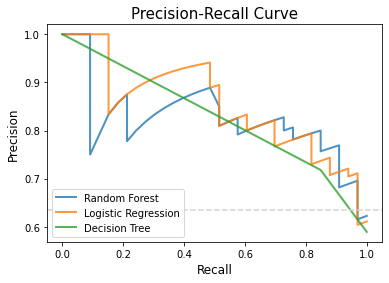

In [15]:
names = {"rf": "Random Forest", "lr": "Logistic Regression", "dt": "Decision Tree"}
plt.figure()
for index, row in val_storage.iterrows():
    plt.plot(row.recall, row.precision, lw=2, alpha=.8, label=names[row["Model"]])
plt.title("Precision-Recall Curve", fontsize=15)
value_counts = y.value_counts()
plt.axhline(value_counts[1]/y.count(), color="lightgrey", linestyle="--")
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Recall", fontsize=12)
plt.legend(loc="lower left")
plt.savefig("figures/prc.png")
plt.show()

## Imputation Assesment

In [23]:
imputed = pd.read_csv("metrics/imputed.csv")
imputed.head()

,Unnamed: 0,AGE,AGE.1,WBC,WBC.1,Platelets,Platelets.1,Neutrophils,Neutrophils.1,Lymphocytes,Lymphocytes.1,Monocytes,Monocytes.1,Eosinophils,Eosinophils.1,Basophils,Basophils.1,CRP,CRP.1,AST,AST.1,ALT,ALT.1,ALP,ALP.1,GGT,GGT.1,LDH,LDH.1
0,NaN,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std
1,Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,original,61.77617328519855,17.815695199686267,8.55306859205776,4.855353347526425,226.5321299638989,101.1741776222978,6.200478468899522,4.172581031241283,1.1865384615384615,0.8064423801631618,0.6057416267942584,0.410048719243348,0.05502392344497608,0.13223712821580536,0.014423076923076924,0.039116496960338365,90.889010989011,94.42140575151268,54.20216606498195,57.612796695849184,44.91729323308271,45.5032315025435,89.89312977099236,89.08986404475988,82.4779411764706,132.70250587445392,380.4484536082474,193.98352027296716
3,1.0,61.83870967741935,17.772922369495127,8.574193548387097,4.862791554592019,226.65376344086022,100.8198641774724,6.597491039426522,4.482061866435994,1.2598566308243728,0.8987409143740496,0.6494623655913978,0.45541276776807915,0.06594982078853047,0.14723498686752898,0.01720430107526882,0.04056344860498391,92.58136200716845,96.87504900128604,54.2078853046595,57.457896460415796,47.458781362007166,49.868433953598334,82.36200716845879,66.09058633203506,79.68100358422939,119.07162781917101,379.51612903225805,199.69326908370198
4,2.0,61.831541218637994,17.767592602732545,8.556989247311828,4.8402255844657756,225.95125448028674,101.0669323249286,6.597491039426523,4.300814814772032,1.236200716845878,0.8066815690298333,0.6551971326164875,0.45837515720199107,0.05197132616487455,0.1398408109682711,0.01505376344086022,0.03871934589552013,91.24695340501793,94.97281843077457,54.26881720430107,57.421978305182535,47.40501792114696,50.648287626316595,81.80286738351255,65.19401475667733,73.4695340501792,103.19942088677071,365.7060931899642,178.11476677298714


In [29]:
for var in imputed.columns[1:]:
    tmp = imputed[var][3:].astype(float)
    print("{:s}: min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, mode: {:.2f}".format(var, tmp.min(), tmp.max(), tmp.mean(), tmp.median(), tmp.mode()[0]))

AGE: min: 61.73, max: 61.87, mean: 61.82, median: 61.83, mode: 61.83
AGE.1: min: 17.77, max: 17.81, mean: 17.78, median: 17.77, mode: 17.77
WBC: min: 8.53, max: 8.60, mean: 8.56, median: 8.56, mode: 8.53
WBC.1: min: 4.84, max: 4.87, mean: 4.85, median: 4.84, mode: 4.84
Platelets: min: 225.95, max: 226.65, mean: 226.38, median: 226.45, mode: 225.95
Platelets.1: min: 100.82, max: 101.32, mean: 101.00, median: 100.91, mode: 100.82
Neutrophils: min: 6.59, max: 6.65, mean: 6.61, median: 6.60, mode: 6.59
Neutrophils.1: min: 4.30, max: 4.48, mean: 4.40, median: 4.41, mode: 4.30
Lymphocytes: min: 1.21, max: 1.26, mean: 1.23, median: 1.23, mode: 1.21
Lymphocytes.1: min: 0.80, max: 0.90, mean: 0.82, median: 0.81, mode: 0.80
Monocytes: min: 0.64, max: 0.66, mean: 0.65, median: 0.65, mode: 0.64
Monocytes.1: min: 0.43, max: 0.47, mean: 0.45, median: 0.46, mode: 0.43
Eosinophils: min: 0.05, max: 0.07, mean: 0.06, median: 0.05, mode: 0.05
Eosinophils.1: min: 0.12, max: 0.15, mean: 0.13, median: 0.13,

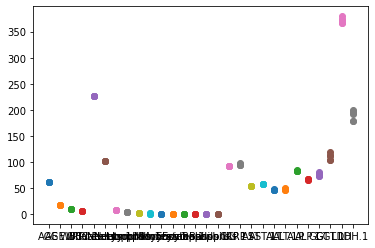

In [30]:
tmp = []
for var in imputed.columns[1:]:
    tmp2 = imputed[var][3:].astype(float)
    tmp.append((float(imputed[var][1]), tmp2.min(), tmp2.max(), tmp2.mean(), tmp2.median(), tmp2.mode()[0]))

for xe, ye in zip(imputed.columns[1:], tmp):
    plt.scatter([xe] * len(ye), ye)

In [13]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator(features="all")
mask_all = indicator.fit_transform(X)

In [22]:
imputed_y = y[set(X[mask_all].index)]
imputed_y.value_counts()

1    117
0     79
Name: SWAB, dtype: int64

In [4]:
imputed_list = []
for i in range(25):
    tmp = pd.read_csv(f"imputed_sets/imputed{i}.csv")
    imputed_list.append(tmp)

In [6]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator(features="all")
mask_all = indicator.fit_transform(X)
def describe_only_imputed(original, imputed_sets, mask):
    """
    Creates a dataframe with mean and standard deviations (std) for the original and imputed data
    """
    # initialize dataframe
    header = ["Dataset"]
    for column in original.columns[2:]:
        for metric in ["mean", "std"]:
            header.append((column, metric))
    describe_df = pd.DataFrame(columns=header)
    # compute mean and std for original dataframe
    original = original.describe().iloc[1:3]
    tmp = ["original"]
    for column in original.columns[2:]:
        for metric in ["mean", "std"]:
            tmp.append(original.loc[metric, column])
    describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    # compute mean and std for every imputed dataframe
    for df, idx in zip(imputed_sets, range(len(imputed_sets))):
        df = df.where(mask)
        t = df.describe().iloc[1:3]
        tmp = [int(idx+1)]
        for column in t.columns[2:]:
            for metric in ["mean", "std"]:
                tmp.append(t.loc[metric, column])
        describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    # reorder columns for better visualization
    describe_df.set_index("Dataset", inplace=True)
    describe_df.columns = pd.MultiIndex.from_tuples(describe_df.columns)
    return describe_df

In [7]:
df_masked = describe_only_imputed(X, imputed_list ,mask_all)

In [8]:
df_masked.head()

AGE                   WBC            Platelets              \
               mean        std       mean       std       mean         std   
Dataset                                                                      
original  61.776173  17.815695   8.553069  4.855353  226.53213  101.174178   
1.0       70.500000   7.778175  11.500000  7.071068  243.50000    2.121320   
2.0       69.500000   6.363961   9.100000  2.404163  145.50000   37.476659   
3.0       75.000000   7.071068  15.150000  0.777817  192.50000   50.204581   
4.0       55.000000   8.485281   9.050000  1.484924  232.00000   74.953319   

         Neutrophils           Lymphocytes           Monocytes            \
                mean       std        mean       std      mean       std   
Dataset                                                                    
original    6.200478  4.172581    1.186538  0.806442  0.605742  0.410049   
1.0         7.782857  5.152795    1.474648  1.105405  0.780000  0.552884   
2.0         7.782857  4.487502    1.381690  0.795220  0.802857  0.556899   
3.0         7.992857  4.946652    1.319718  0.783512  0.817143  0.599993   
4.0         7.891429  4.658505    1.352113  0.799618  0.754286  0.468326   

         Eosinophils           Basophils                   CRP              \
                mean       std      mean       std        mean         std   
Dataset                                                                      
original    0.055024  0.132237  0.014423  0.039116   90.889011   94.421406   
1.0         0.098571  0.182171  0.025352  0.043812  169.583333  171.825765   
2.0         0.042857  0.161130  0.016901  0.037743  107.533333  127.199617   
3.0         0.051429  0.088043  0.014085  0.035034  109.000000   80.700384   
4.0         0.050000  0.097431  0.022535  0.051262  116.850000   89.815450   

                AST                   ALT                    ALP             \
               mean        std       mean         std       mean        std   
Dataset                                                                       
original  54.202166  57.612797  44.917293   45.503232  89.893130  89.089864   
1.0       55.000000  41.012193  99.461538   93.887890  75.695946  33.854161   
2.0       63.500000  19.091883  98.307692  103.728319  74.641892  30.146809   
3.0       48.500000  17.677670  84.769231   78.776217  77.810811  37.640684   
4.0       30.000000  18.384776  86.692308   80.528861  77.020270  37.065023   

                GGT                     LDH              
               mean         std        mean         std  
Dataset                                                  
original  82.477941  132.702506  380.448454  193.983520  
1.0       77.020979  104.883535  377.388235  213.331013  
2.0       64.902098   62.902598  332.058824  129.954420  
3.0       68.440559   73.996157  338.800000  182.064667  
4.0       68.636364   91.091159  361.811765  198.848740

In [22]:
for var in df_masked.columns:
    tmp = df_masked[var][1:]
    print("{:s}: min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, mode: {:.2f}".format(str(var), tmp.min(), tmp.max(), tmp.mean(), tmp.median(), tmp.mode()[0]))

('AGE', 'mean'): min: 55.00, max: 75.00, mean: 67.90, median: 69.50, mode: 69.50
('AGE', 'std'): min: 6.36, max: 20.51, mean: 10.04, median: 7.78, mode: 6.36
('WBC', 'mean'): min: 5.90, max: 15.15, mean: 10.14, median: 9.10, mode: 5.90
('WBC', 'std'): min: 0.57, max: 7.07, mean: 2.46, median: 1.48, mode: 0.57
('Platelets', 'mean'): min: 145.50, max: 243.50, mean: 205.60, median: 214.50, mode: 145.50
('Platelets', 'std'): min: 2.12, max: 169.00, mean: 66.75, median: 50.20, mode: 2.12
('Neutrophils', 'mean'): min: 7.76, max: 7.99, mean: 7.84, median: 7.78, mode: 7.78
('Neutrophils', 'std'): min: 4.49, max: 5.15, mean: 4.83, median: 4.91, mode: 4.49
('Lymphocytes', 'mean'): min: 1.27, max: 1.47, mean: 1.36, median: 1.35, mode: 1.27
('Lymphocytes', 'std'): min: 0.78, max: 1.11, mean: 0.85, median: 0.80, mode: 0.78
('Monocytes', 'mean'): min: 0.75, max: 0.82, mean: 0.78, median: 0.78, mode: 0.75
('Monocytes', 'std'): min: 0.47, max: 0.60, mean: 0.54, median: 0.55, mode: 0.47
('Eosinophils',

In [10]:
df_masked.to_latex(buf="metrics/masked_imputed.tex", float_format="%.3f", index=True)

In [11]:
from scipy.stats import mannwhitneyu
def u_test_df(original, imputed_sets):
    """
    Creates a dataframe with mean and standard deviations (std) for the original and imputed data
    """
    # initialize dataframe
    header = ["Dataset"]
    for column in original.columns[2:]:
        for metric in ["test value", "p-value"]:
            header.append((column, metric))
    describe_df = pd.DataFrame(columns=header)
    # compute mean and std for every imputed dataframe
    for df, idx in zip(imputed_sets, range(len(imputed_sets))):
        tmp = [int(idx+1)]
        for column in df.columns[2:]:
            values = mannwhitneyu(original[column], df[column])
            for i,metric in enumerate(["test value", "p-value"]):
                tmp.append(values[i])
        describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    # reorder columns for better visualization
    describe_df.set_index("Dataset", inplace=True)
    describe_df.columns = pd.MultiIndex.from_tuples(describe_df.columns)
    return describe_df

In [12]:
df_u = u_test_df(X, imputed_list)

In [33]:
df_u.head()

AGE                  WBC            Platelets            \
        test value   p-value test value   p-value test value   p-value   
Dataset                                                                  
1.0        38718.0  0.457747    38732.0  0.460674    38733.0  0.460885   
2.0        38703.5  0.454727    38721.0  0.458381    38473.5  0.407304   
3.0        38765.5  0.467658    38856.0  0.486593    38596.0  0.432445   
4.0        38558.0  0.424592    38723.5  0.458902    38672.5  0.448292   
5.0        38711.5  0.456393    38558.0  0.424608    38618.5  0.437096   

        Neutrophils           Lymphocytes                Monocytes            \
         test value   p-value  test value       p-value test value   p-value   
Dataset                                                                        
1.0         30379.0  0.000004     30061.5  1.599593e-06    30729.5  0.000008   
2.0         30854.0  0.000011     30282.0  2.787751e-06    30930.5  0.000013   
3.0         30726.5  0.000008     29883.0  1.006822e-06    30951.5  0.000013   
4.0         30807.5  0.000010     29886.0  1.015959e-06    30569.5  0.000005   
5.0         30627.0  0.000007     29492.5  3.579304e-07    30492.0  0.000004   

        Eosinophils                Basophils                      CRP  \
         test value       p-value test value       p-value test value   
Dataset                                                                 
1.0         30660.5  4.113835e-07    29885.0  3.533520e-10    38342.0   
2.0         28607.0  1.351803e-10    29264.0  1.135552e-11    38089.5   
3.0         29462.5  5.137785e-09    29057.0  3.292185e-12    38281.5   
4.0         29206.0  1.764304e-09    29485.0  3.995008e-11    38241.5   
5.0         29425.0  4.317245e-09    29264.0  1.135552e-11    38108.5   

                         AST                  ALT                  ALP  \
          p-value test value   p-value test value   p-value test value   
Dataset                                                                  
1.0      0.380740    38666.5  0.447036    37888.0  0.293877    17693.0   
2.0      0.331368    38773.0  0.469227    37885.5  0.293424    17909.0   
3.0      0.368696    38709.0  0.455875    37739.0  0.267507    17950.0   
4.0      0.360802    38546.5  0.422233    37666.5  0.255125    17898.0   
5.0      0.334995    38506.5  0.414028    37637.0  0.250174    18166.5   

                             GGT                      LDH                
              p-value test value       p-value test value       p-value  
Dataset                                                                  
1.0      3.628536e-29    19648.5  2.223658e-24    26864.0  1.214910e-10  
2.0      1.285772e-28    18885.5  3.422496e-26    26091.0  8.064764e-12  
3.0      1.633355e-28    19372.0  4.993941e-25    25764.5  2.443115e-12  
4.0      1.207607e-28    18751.5  1.616675e-26    26550.0  4.116175e-11  
5.0      5.714573e-28    18797.0  2.088532e-26    26349.0  2.029800e-11

In [13]:
df_u.to_latex(buf="metrics/u_imputed.tex", float_format="%.3f", index=True)

In [14]:
idx = pd.IndexSlice
df_u.loc[idx[:], idx[:, 'p-value']] < 0.05

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH
,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value
Dataset,,,,,,,,,,,,,,
1.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
2.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
3.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
4.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
5.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
6.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
7.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
8.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True


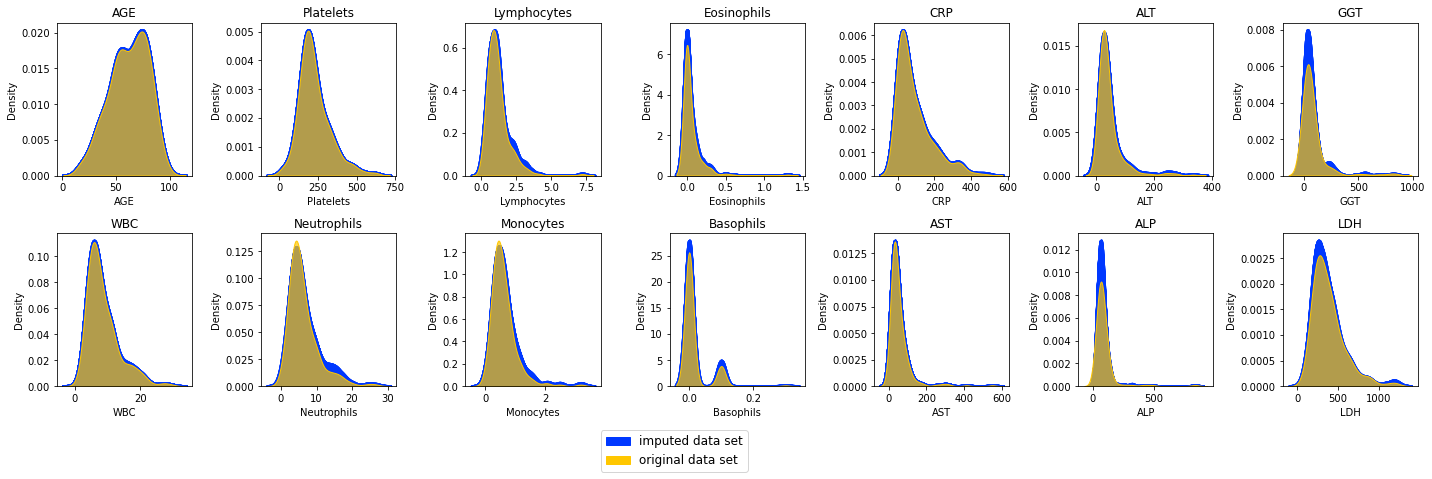

In [10]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#0038FF', label='imputed data set')
green_patch = mpatches.Patch(color='#FFC700', label='original data set')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    for ds in imputed_list:
        sns.kdeplot(ds[ds.columns[x]], ax=axes[i,j], color="#0038FF", fill=True, alpha=.5, linewidth=3)
    sns.kdeplot(X[X.columns[x]], ax=axes[i,j], color="#FFC700", fill=True, alpha=.7)
    axes[i,j].set_title(X.columns[x])
plt.tight_layout()
plt.legend(handles=[blue_patch, green_patch], loc="lower center",bbox_to_anchor=(-4.5,-0.6), fontsize="large")
fig.savefig('figures/imputed.png', bbox_inches='tight')

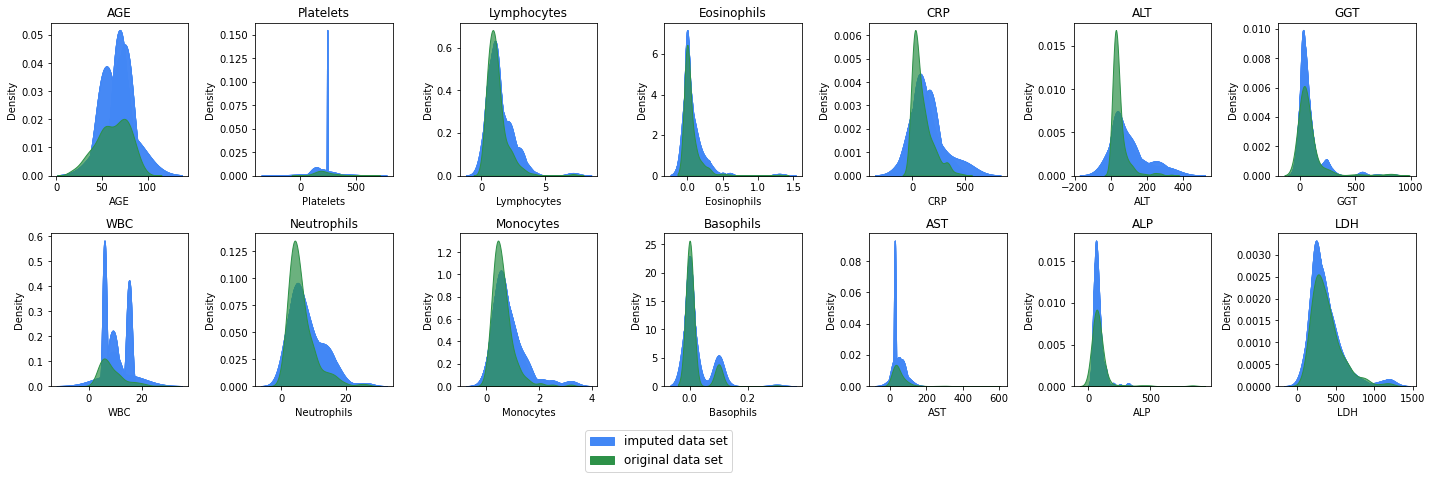

In [46]:
from sklearn.impute import MissingIndicator
import matplotlib.patches as mpatches
indicator = MissingIndicator(features="all")
mask_all = indicator.fit_transform(X)
blue_patch = mpatches.Patch(color='#4287f5', label='imputed data set')
green_patch = mpatches.Patch(color='#2d9148', label='original data set')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    for ds in imputed_list:
        ds = ds.where(mask_all)
        sns.kdeplot(ds[ds.columns[x]], ax=axes[i,j], color="#4287f5", fill=True, alpha=.5)
    sns.kdeplot(X[X.columns[x]], ax=axes[i,j], color="#2d9148", fill=True, alpha=.7)
    axes[i,j].set_title(X.columns[x])
plt.tight_layout()
plt.legend(handles=[blue_patch, green_patch], loc="lower center",bbox_to_anchor=(-4.5,-0.6), fontsize="large")
fig.savefig("figures/imputed_only.png")